In [2]:
%load_ext autoreload
%autoreload 2
import os; import sys;src_dir = os.path.join(os.getcwd(), os.pardir, 'src');sys.path.append(src_dir)

In [3]:
import visualization.visualize as vis
import pandas as p
from data.dal import DAL
import data.stickfigure as sf

In [4]:
dal = DAL("split.hdf")
ov = dal.overview()
skeleton = dal.get(ov.df_key[0])
ov

,df_key,execution_type,exercise,person
0,skeleton_101,1,squat,person8
1,skeleton_102,1,squat,person8
2,skeleton_103,1,squat,person8
3,skeleton_104,1,squat,person8
4,skeleton_105,1,squat,person8
5,skeleton_106,1,squat,person8
6,skeleton_107,1,squat,person8
7,skeleton_108,1,squat,person8
8,skeleton_109,1,squat,person8
9,skeleton_201,1,squat,person8


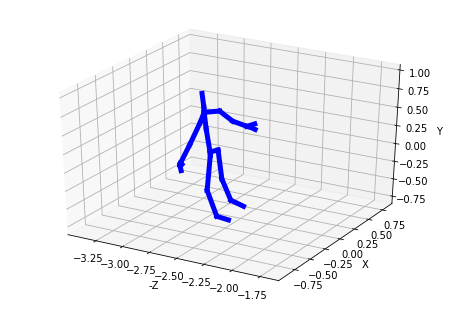

In [110]:
vis.kinect.stickfigureplot(skeleton)

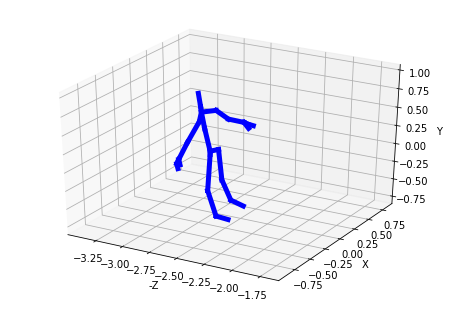

In [111]:
vis.kinect.stickfigureanim(skeleton)

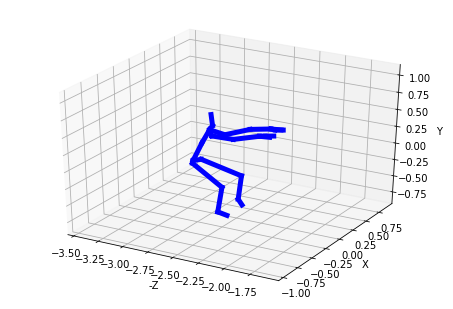

In [42]:
t = list(skeleton.itertuples())[150]
vis.plot_skeleton(list(skeleton.itertuples())[150])

CPU times: user 8.63 s, sys: 104 ms, total: 8.73 s
Wall time: 8.91 s


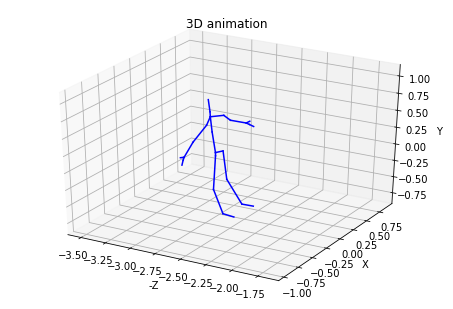

In [9]:
%%time
vis.animate_skeleton(skeleton[300:500])

/export/home1/NoCsBack/dtai/tomdmnt/miniconda3/envs/amie/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/export/home1/NoCsBack/dtai/tomdmnt/miniconda3/envs/amie/lib/python3.6/site-packages/matplotlib/transforms.py:958: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 0] = interval
/export/home1/NoCsBack/dtai/tomdmnt/miniconda3/envs/amie/lib/python3.6/site-packages/matplotlib/transforms.py:963: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval
/export/home1/NoCsBack/dtai/tomdmnt/miniconda3/envs/amie/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


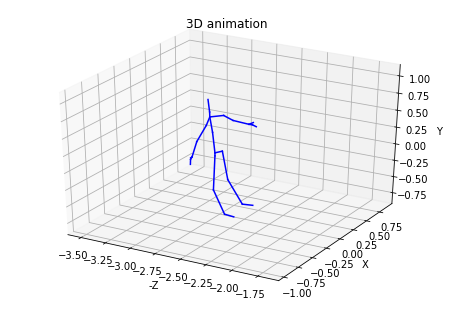

In [46]:
vis.animate_skeleton(skeleton.apply(smooth)[300:500])

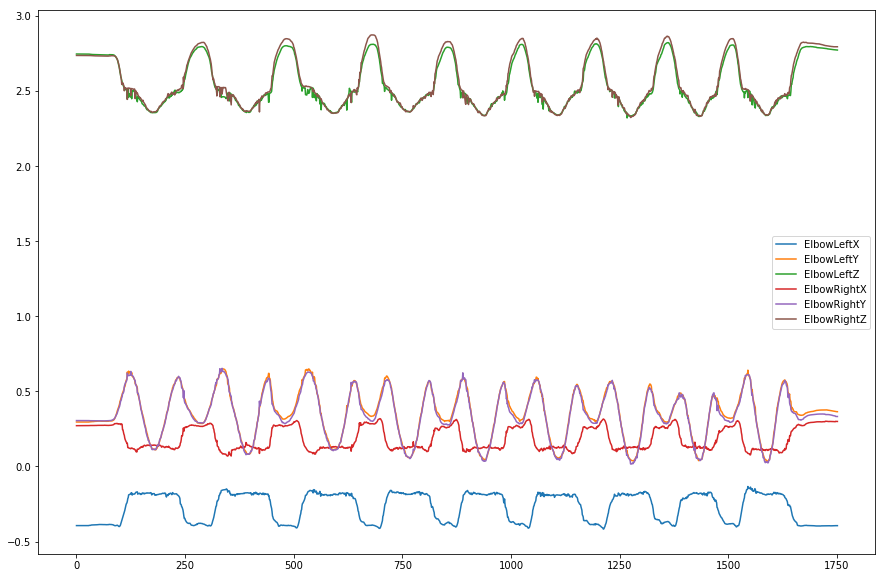

In [8]:
import matplotlib.pyplot as plt
columns = [c for c in skeleton.columns if 'Elbow' in c]
skeleton[columns].plot(figsize=(15,10))
plt.show()

/export/home1/NoCsBack/dtai/tomdmnt/miniconda3/envs/amie/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


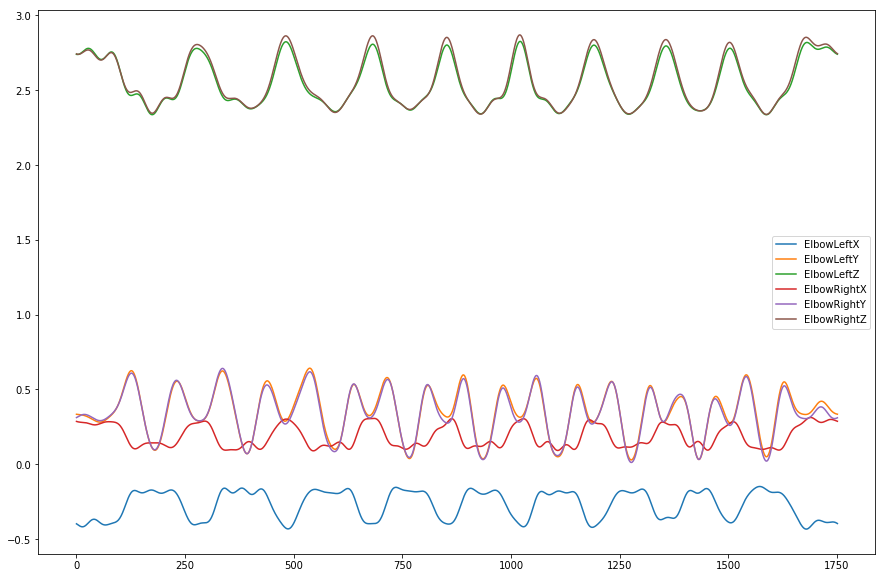

In [45]:
import numpy as np

def smooth(y):
    ft = np.fft.fft(y)
    ftabs = np.abs(ft)
    #return np.append(rft,[0]*875)
    idx = np.argsort(ftabs)[::-1]
    for i in idx[50:]:
        ft[i] = 0  # Note, rft.shape = 21
    return np.fft.ifft(ft)

newsk = skeleton.apply(smooth)
newsk[columns].plot(figsize=(15,10))
plt.show()